In [1]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import zscore
    


In [2]:
    file_path = '../data/sierraleone-bumbuna.csv'
    df = pd.read_csv(file_path, parse_dates=['Timestamp'])
    df.info()
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [3]:
    # Drop the empty 'Comments' column
    df.drop(columns=['Comments'], inplace=True)

    # Correct impossible negative solar irradiance values
    irradiance_cols = ['GHI', 'DNI', 'DHI']
    for col in irradiance_cols:
        df[col] = df[col].apply(lambda x: 0 if x < 0 else x)

    # Verify the cleaning
    print("Cleaned Data Summary (min values should now be 0):")
    print(df[irradiance_cols].describe())
    


Cleaned Data Summary (min values should now be 0):
                 GHI            DNI            DHI
count  525600.000000  525600.000000  525600.000000
mean      204.406778     116.523731     116.273677
std       296.787520     218.573992     157.020868
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.300000       0.000000       0.000000
75%       362.400000     107.000000     224.700000
max      1499.000000     946.000000     892.000000


In [4]:
    # Calculate Z-scores for GHI to flag statistical outliers
    df['GHI_zscore'] = zscore(df['GHI'])
    outliers = df[df['GHI_zscore'].abs() > 3]
    print(f"Number of statistical outliers detected in GHI: {len(outliers)}")
    


Number of statistical outliers detected in GHI: 2574


In [5]:
    # Remove the temporary z-score column before saving
    df.drop(columns=['GHI_zscore'], inplace=True)
    df.to_csv('../data/sierraleone-clean.csv', index=False)
    print("Cleaned Sierra Leone data has been exported successfully.")
    


Cleaned Sierra Leone data has been exported successfully.


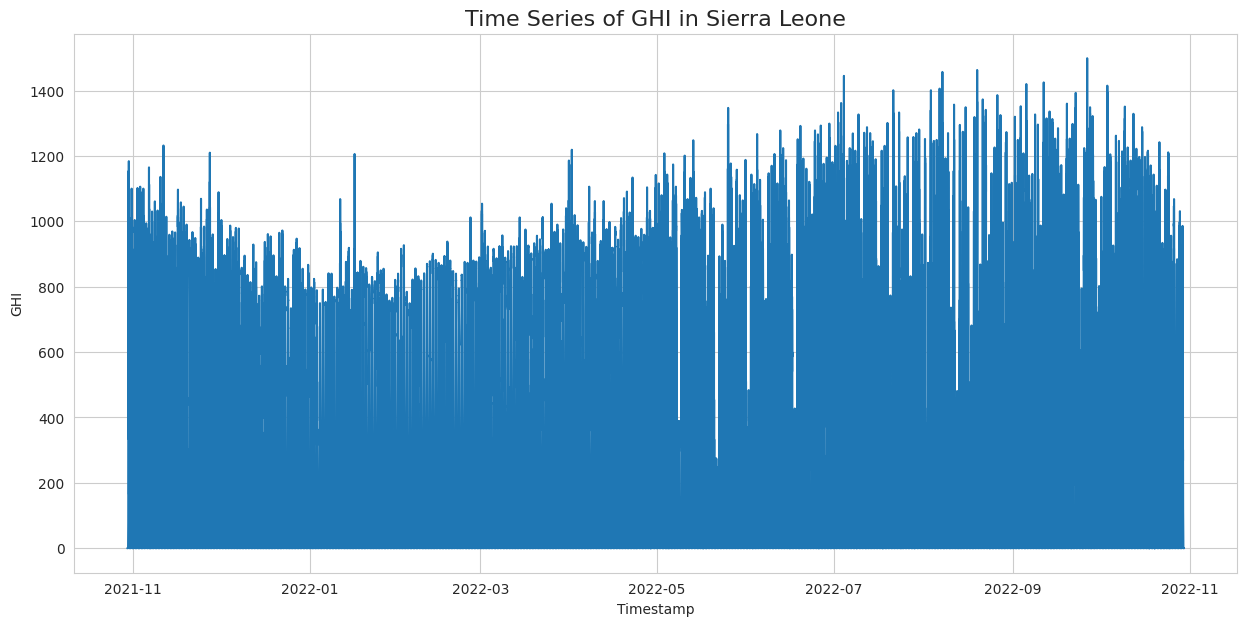

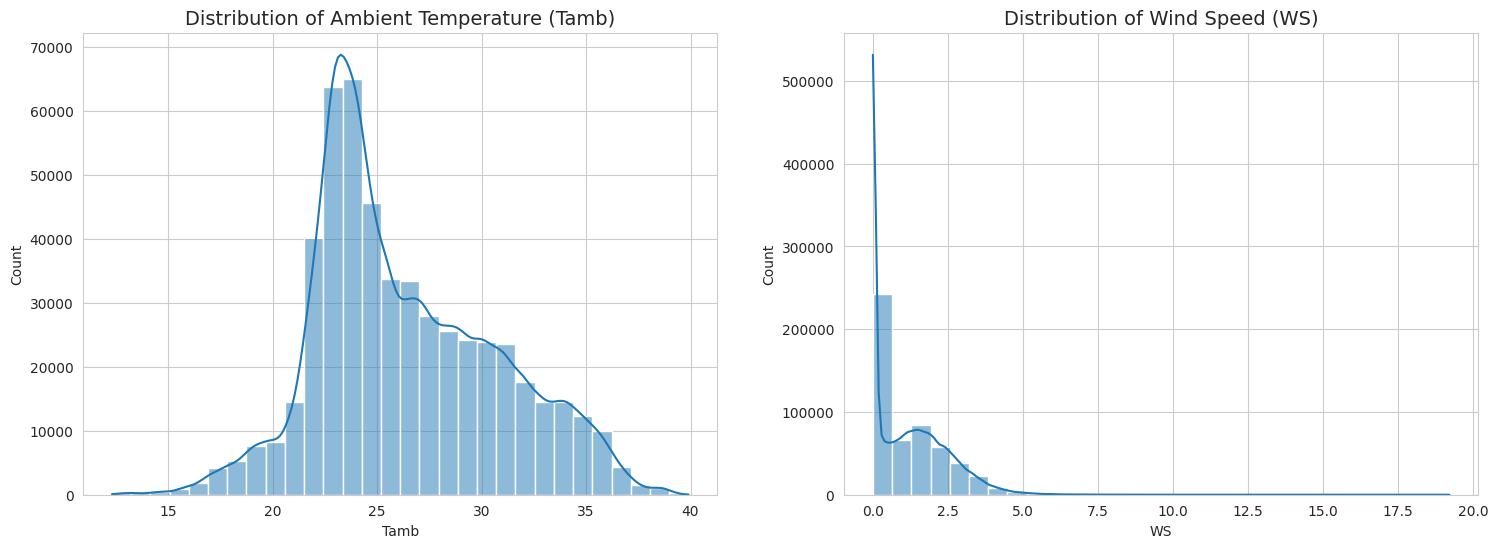

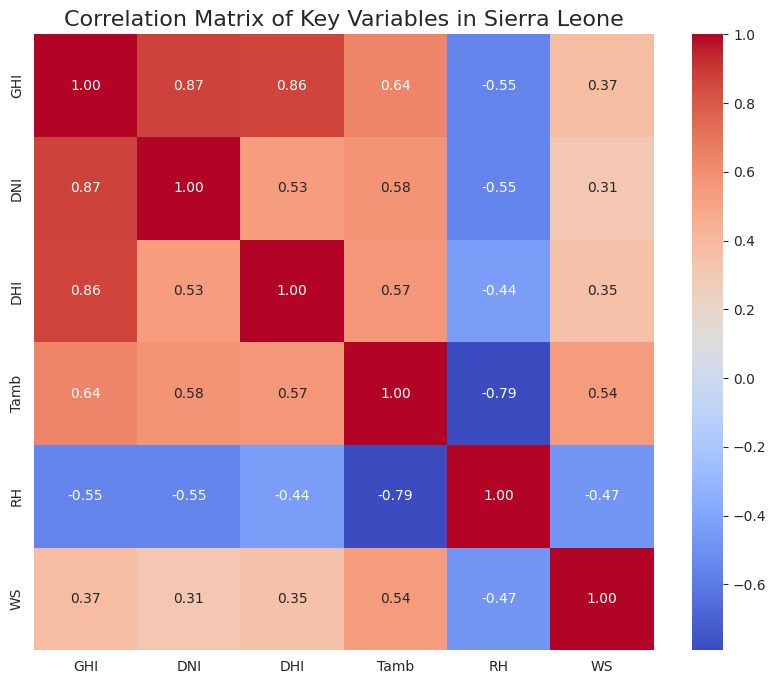

In [6]:
    sns.set_style("whitegrid")

    # Plot 1: Time Series of GHI
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=df, x='Timestamp', y='GHI')
    plt.title('Time Series of GHI in Sierra Leone', fontsize=16)
    plt.show()

    # Plot 2 & 3: Distribution of Temperature and Wind Speed
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    sns.histplot(df['Tamb'], bins=30, kde=True, ax=axes[0])
    axes[0].set_title('Distribution of Ambient Temperature (Tamb)', fontsize=14)
    sns.histplot(df['WS'], bins=30, kde=True, ax=axes[1])
    axes[1].set_title('Distribution of Wind Speed (WS)', fontsize=14)
    plt.show()

    # Plot 4: Correlation Heatmap
    correlation_cols = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']
    correlation_matrix = df[correlation_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Key Variables in Sierra Leone', fontsize=16)
    plt.show()
